In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import astropy

In [2]:
response_dict = {
    "#1" : 1,
    "#2" : 2,
    "#3" : 3,
    "#4" : 4,
    "#5" : 5,
    "No good match" : 0,
}

In [3]:
classification = Table.from_pandas(pd.read_csv(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications.csv'))

In [4]:
ccs_workflow = np.where(classification["workflow_name"] == "Core Collapse Supernovae")

In [5]:
classification[ccs_workflow][50]

classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
int64,str34,float64,str20,int64,str25,float64,str23,float64,float64,str1216,str532,str485,int64
294870524,ElisabethB,123.0,f0b7035305b19bffddb5,16969,Core Collapse Supernovae,8.21,2020-12-15 17:44:42 UTC,--,--,"{""source"":""api"",""session"":""06c502ec1de2f48926d7dda9135525359515b594dbd954df80e23f50da52fcdd"",""viewport"":{""width"":1455,""height"":688},""started_at"":""2020-12-15T17:44:36.313Z"",""user_agent"":""Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"",""utc_offset"":""-3600"",""finished_at"":""2020-12-15T17:44:40.971Z"",""live_project"":true,""interventions"":{""opt_in"":true,""messageShown"":false},""user_language"":""en"",""user_group_ids"":[],""subject_dimensions"":[{""clientWidth"":935,""clientHeight"":525,""naturalWidth"":4800,""naturalHeight"":2700},null,null,null,null],""subject_selection_state"":{""retired"":false,""selected_at"":""2020-12-15T17:43:42.256Z"",""already_seen"":false,""selection_state"":""normal"",""finished_workflow"":false,""user_has_finished_workflow"":false},""workflow_translation_id"":""39739""}","[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]","{""53626571"":{""retired"":null,""z_snid"":0.024,""!ZTF_Name"":""ZTF19aamljom"",""z_snid_err"":0.005,""!ZTF_Version"":""ZTF19aamljom_20190419_P60_v1""}}",53626571


In [6]:
subject_ids_unique = np.unique(classification[ccs_workflow]["subject_ids"])

In [7]:
right_workflow = classification[ccs_workflow]

In [8]:
data_np = np.load(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications.npy', allow_pickle = True)

In [9]:
len(data_np[:,1][0])

1

In [10]:
data_array = []
for i in data_np:
    if(len(i[1]) > 10):
        data_array.append([i[0], right_workflow[i[1]]])

In [11]:
size = []
for i in data_np[:,1]:
    size.append(len(i))

In [12]:
exec("dict =" + data_array[0][1]["annotations"][0])

In [13]:
json.loads(data_array[0][1]["annotations"][0])[0]

{'task': 'T0',
 'task_label': 'Which spectrum is the best match?',
 'value': '#1'}

In [14]:
dict[0]["value"].split("#")[-1]

'1'

In [15]:
data_array[0][1]["annotations"]

"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#2""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#2""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"


In [16]:
json.loads(data_array[0][1][0]["subject_data"])['53623567']

{'retired': None,
 'z_snid': 0.0,
 '!ZTF_Name': 'ZTF17aaajnki',
 'z_snid_err': 0.002,
 '!ZTF_Version': 'ZTF17aaajnki_20180320_P60_v2'}

In [17]:
ResultsTable_Zooniverse = Table(
                    names=("ZTF_Name", "Version", "subject_ids", "NoMatch", "#1", "#2", "#3", "#4", "#5"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32", "int32"
                          )
                    )
for line in data_array:
    row = []
    data = line[1]
    metadata = json.loads(data[0]["subject_data"])[str(line[0])]
    row.append(metadata["!ZTF_Name"])
    row.append(metadata["!ZTF_Version"] + ".ascii")
    row.append(line[0])
    responses = [0, 0, 0, 0, 0, 0]
    for i in data:
        value = json.loads(i["annotations"])[0]["value"]
        if(value is not None):
            index = response_dict[value]
            responses[index] = responses[index] + 1
    row.extend(responses)
    ResultsTable_Zooniverse.add_row(row)

In [18]:
metadata = json.loads(data[0]["subject_data"])[str(line[0])]
value = json.loads(i["annotations"])[0]["value"]

In [19]:
np.sum(ResultsTable_Zooniverse["NoMatch"])

5109

In [20]:
np.sum(ResultsTable_Zooniverse["#1"])

6521

In [21]:
np.sum(ResultsTable_Zooniverse["#2"])

4389

In [22]:
np.sum(ResultsTable_Zooniverse["#3"])

4093

In [23]:
np.sum(ResultsTable_Zooniverse["#4"])

3720

In [24]:
np.sum(ResultsTable_Zooniverse["#5"])

3813

In [25]:
ResultsTable_Zooniverse.to_pandas().to_csv("FirstAnalysis.csv")

In [26]:
snidoutput = Table.from_pandas(pd.read_csv("SNID_2020_output.csv"))

In [27]:
joined_results = astropy.table.join(snidoutput, ResultsTable_Zooniverse)

In [28]:
ResultsTable_Zooniverse_Classes = Table(
                    names=("ZTF_Name", "Version", "subject_ids", 'Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch", "rlap", "z"
                    ),
                    meta={"name": "Vote Types"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32" , "int32", "int32", "int32", "int32", "int32", "int32",
                           "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "float32", "float32"
                          )
                    )

for i in range(len(joined_results)):
    line = joined_results[i]
    row = [line["ZTF_Name"], line["Version"], line["subject_ids"]]
    row.extend(np.zeros(28))
    row.append(line["NoMatch"])
    ResultsTable_Zooniverse_Classes.add_row(row)
    ResultsTable_Zooniverse_Classes[i][line["c_snid_1"]] += line["#1"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_2"]] += line["#2"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_3"]] += line["#3"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_4"]] += line["#4"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_5"]] += line["#5"]
    top_line = [line["c_snid_1"], line["c_snid_2"], line["c_snid_3"],line["c_snid_4"], line["c_snid_5"]]
    classes = np.unique(top_line)
    votes = ResultsTable_Zooniverse_Classes[i][classes.tolist()]
    vote_data = []
    for j in votes:
        vote_data.append(j)
    best = np.where(np.asarray(top_line) == classes[np.argmax(vote_data)])[0][0]
    ResultsTable_Zooniverse_Classes[i]["rlap"] = line["rlap_{}".format(best + 1)]
    ResultsTable_Zooniverse_Classes[i]["z"] = line["z_snid_{}".format(best + 1)]

In [29]:
len(joined_results)

2518

In [30]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,9,2,0,0,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaazdba_20190315_P60_v1.ascii,ZTF17aaazdba,sn2013dg,4.27,0.2648,0.0143,1,1,sn2013dg,4.27,Ic-SLSN,0.2648,0.0143,5.16,0,2,ASASSN-15lh,4.2,Ic-SLSN,0.2981,0.0191,20.28,0,3,sn96L,4.15,IIn,0.3161,0.0071,322.8,0,7,sn2007C,4.07,Ib-norm,0.4644,0.0127,13.8,0,9,sn05gj,3.76,Ia-csm,0.0529,0.0182,48.11,0,53623579,7,3,0,0,0,1
ZTF17aaazdba_20190424_P60_v1.ascii,ZTF17aaazdba,sn90N,7.32,0.9621,0.0085,0,1,sn90N,7.32,Ia-norm,0.9621,0.0085,-6.4,0,3,SSS120810-23,6.15,Ic-SLSN,0.7381,0.0144,38.63,0,4,sn2015bn,5.83,Ic-SLSN,0.4979,0.0072,5.84,0,5,sn2013dx,5.41,Ic-BL,0.5423,0.016,-3.2,0,6,sn2008ax,5.32,IIb,0.7182,0.0101,-13.0,0,53623588,2,0,1,7,1,0
ZTF17aaazdba_20190925_Keck1_v4.ascii,ZTF17aaazdba,ASASSN14li,12.26,0.0225,0.002,1,1,ASASSN14li,12.26,TDE,0.0225,0.002,136.0,1,2,sn1994I,7.1,Ic-norm,0.0431,0.0105,3.5,0,3,sn97ef,7.1,Ic-BL,0.0431,0.0134,13.8,0,4,sn1999by,6.99,Ia-91bg,0.0409,0.0093,4.0,0,13,sn2002ap,5.88,Ic-BL,0.0424,0.0137,11.6,0,53623594,0,11,0,0,0,0
ZTF17aaburzk_20180717_P60_v1.ascii,ZTF17aaburzk,sn87A,7.8,0.0234,0.0089,1,1,sn87A,7.8,II-norm,0.0234,0.0089,11.3,0,2,sn2003Y,7.76,Ia-91bg,0.0333,0.0094,-6.3,0,10,sn2006ep,6.69,Ib-norm,0.0228,0.0108,8.5,0,17,sn1995F,6.39,Ic-norm,0.0267,0.0111,1.9,1,21,sn2007ax,6.16,Ia-91bg,0.0302,0.0123,-1.9,0,53623599,7,0,1,1,0,2
ZTF18aaabltn_20190502_DCT_v1.ascii,ZTF18aaabltn,qso,22.9,0.045,0.0012,1,1,qso,22.9,QSO,0.045,0.0012,-100.0,2,2,agn,21.11,AGN,0.0449,0.0014,-99.9,2,3,sn06bc,13.66,II-norm,0.0444,0.0018,9.0,0,4,kcSB3,11.93,Gal,0.0457,0.0019,-99.9,2,5,kcSB5,10.74,Gal,0.045,0.0021,-99.9,2,53623603,0,1,7,1,1,1
ZTF18aaadtdc_20181106_P60_v1.ascii,ZTF18aaadtdc,agn,30.5,0.0359,0.0013,1,1,agn,30.5,AGN,0.0359,0.0013,-99.9,2,2,qso,23.31,QSO,0.0358,0.0015,-100.0,2,3,kcSB5,14.41,Gal,0.0359,0.0024,-99.9,2,4,kcSB3,12.83,Gal,0.0366,0.0026,-99.9,2,5,sn06bc,12.54,II-norm,0.0352,0.0027,9.0,0,53623604,0,10,0,0,0,0


In [31]:
ResultsTable_Zooniverse_Classes.to_pandas().to_csv("ClassTotals.csv")

In [32]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"C:\Users\20xha\Documents\Caltech\Research/final_rcf_table.h5"))

In [33]:
Joined_ZTF_2018 = astropy.table.join(ResultsTable_Zooniverse_Classes, final_rcf_table)

In [34]:
types = ['Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch"]

In [35]:
cutoffs = [6,7,8,9,10,11]
rlap_cutoffs = [0, 5, 10, 15, 20]

In [36]:
Joined_ZTF_2018

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z,TNS_Name,discovered_by,tns_internal_name,RA_sn,Dec_sn,sn_type,z_sn,g_jd_max,g_max,g_unc_max,r_jd_max,r_max,r_unc_max,ebv,host_name_PS1,RA_host_PS1,Dec_host_PS1,z_host,sep,projected_kpc,gKron_PS1,rKron_PS1,iKron_PS1,zKron_PS1,yKron_PS1,w1_host,w2_host,ebv_host
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,str9,str13,str29,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,53623619,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8.07,0.0374,SN2018aex,ZTF,ZTF18aabssth,165.1891017637735,22.287497041839774,II,0.026000000000000002,2458494.0531481,20.44230842590332,0.1942138969898224,2458218.7148727,18.741601943969727,0.0452471598982811,0.01536,PSO J165.1878+22.2877,165.18778907,22.28771869,0.022914,4.444857426598462,2.0566548608097266,16.885400772094727,16.492399215698242,16.382200241088867,16.378400802612305,16.610000610351562,15.79401524178536,16.38349243564084,0.015369999999999997
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,53623640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,0,0,0,0,0,0,0,0,0,8.91,0.0497,SN2018aks,ASAS-SN,ASASSN-18ga,157.4650840724913,9.012941499911634,Ib,0.055,2458605.7109144,20.329572677612305,0.19429636001586914,2458224.6804051,18.643957138061523,0.038734324276447296,0.02491,PSO J157.4639+09.0106,157.46385121,9.01059141,0.04797,9.528500357553032,8.957432659525512,16.17099952697754,15.48289966583252,15.268199920654297,15.017000198364258,15.021599769592285,14.822370294989021,15.302806494140818,0.024880000000000003
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,53623657,0,1,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.99,0.065,SN2018hus,ZTF,ZTF18aaemivw,158.42789222392466,39.490720101006524,Ia,0.065,2458423.9633449,19.004362106323242,0.16449931263923645,2458534.8729861,17.948341369628906,0.14575205743312836,0.01219,PSO J158.4280+39.4908,158.42799693,39.49076448,0.068069,0.33188151968390245,0.43235062920637946,16.656200408935547,16.03030014038086,15.668299674987793,15.532500267028809,15.354399681091309,14.936141156716285,15.07967533373213,0.01219
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,53623670,0,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.63,0.4463,SN2018afm,POSS,$\ldots$,119.85422161936124,16.426253328373527,II,0.013000000000000001,--,--,--,2458217.6588079,17.461198806762695,0.020519912242889404,0.03145,PSO J119.8484+16.4214,119.84836822,16.42135334,0.016308,26.827411165906305,8.905321917725965,14.960000038146973,14.491600036621094,14.33240032196045,14.4891996383667,14.872200012207031,13.846603056192345,14.428523248010274,0.031330000000000004
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,53623671,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,15.86,0.0114,SN2018afm,POSS,$\ldots$,119.85422161936124,16.426253328373527,II,0.013000000000000001,--,--,--,2458217.6588079,17.461198806762695,0.020519912242889404,0.03145,PSO J119.8484+16.4214,119.84836822,16.42135334,0.016308,26.827411165906305,8.905321917725965,14.960000038146973,14.491600036621094,14.33240032196045,14.4891996383667,14.872200012207031,13.846603056192345,14.428523248010274,0.031330000000000004
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,53623672,0,0,4,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.72,0.0081,SN2018alc,ASAS-SN,ASASSN-18ge,218.3332647261754,41.267299513642385,Ib,0.024,2458547.9137963,17.372909545898438,0.05406244844198227,2458217.8956713,16.66949462890625,0.007662183605134487,0.01194,PSO J218.3331+41.2658,218.33313709,41.26579342,0.01814,5.4329261283584716,2.00160356681

In [37]:
Classes_Final = Table(
                names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c", "rlap", "agreement"
                ),
                meta={"name": "Spectrum Results after Zooniverse"},
                dtype=("U64", "U64", "U64", "U64", "float32", "int32"
                      )
                )
for line in Joined_ZTF_2018:
    row = []
    row.append(line["ZTF_Name"])
    row.append(line["Version"])
    row.append(line["sn_type"])
    best = []
    best_num = []
    for i in types:
        if(line[i] >= 0):
            best.append(i)
            best_num.append(line[i])
    if(len(best) != 0):
        row.append(best[np.argmax(best_num)])
        row.append(line["rlap"])
        row.append(np.max(best_num))
        Classes_Final.add_row(row)

In [38]:
Classes_Final

ZTF_Name,Version,Real_c,Zooniverse_c,rlap,agreement
str64,str64,str64,str64,float32,int32
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,IIb,8.07,7
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,Ib,IIn,8.91,8
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,Ia,Ia-csm,9.99,10
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,II,Ia-csm,5.63,8
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,II,II-norm,15.86,9
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,Ib,Ib-norm,6.72,6
ZTF18aagrdcs,ZTF18aagrdcs_20180419_P200_v1.ascii,Ib,Ib-norm,18.05,7
ZTF18aagrdcs,ZTF18aagrdcs_20180419_TNG_v1.ascii,Ib,Ic-norm,12.36,7
ZTF18aagrtxs,ZTF18aagrtxs_20180328_P60_v1.ascii,Ia,Ia-norm,12.75,11


In [39]:
tables = []
for cut in cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= cut):
                best.append(i)
                best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [40]:
tables = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9 and line["z"] < .2):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [41]:
negativeII = 0
positiveII = 0
for j in Joined_ZTF_2018:
    correct_1a = "II" in j["sn_type"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

In [42]:
cutoff_confidence = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "II" in j["Real_c"]
        classified_1a = "II" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence.append([i[0],truepositive/(positiveII),falsepositive/(negativeII),len(i[1]), truepositive, falsepositive])
cutoff_confidence = np.asarray(cutoff_confidence)

In [43]:
cutoff_confidence

array([[0.00000000e+00, 1.71328671e-01, 1.73310225e-03, 2.52000000e+02,
        4.90000000e+01, 1.00000000e+00],
       [5.00000000e+00, 1.71328671e-01, 1.73310225e-03, 2.48000000e+02,
        4.90000000e+01, 1.00000000e+00],
       [1.00000000e+01, 1.18881119e-01, 1.73310225e-03, 1.95000000e+02,
        3.40000000e+01, 1.00000000e+00],
       [1.50000000e+01, 4.89510490e-02, 0.00000000e+00, 1.09000000e+02,
        1.40000000e+01, 0.00000000e+00],
       [2.00000000e+01, 6.99300699e-03, 0.00000000e+00, 4.40000000e+01,
        2.00000000e+00, 0.00000000e+00]])

Text(0, 0.5, 'True Positive Rate')

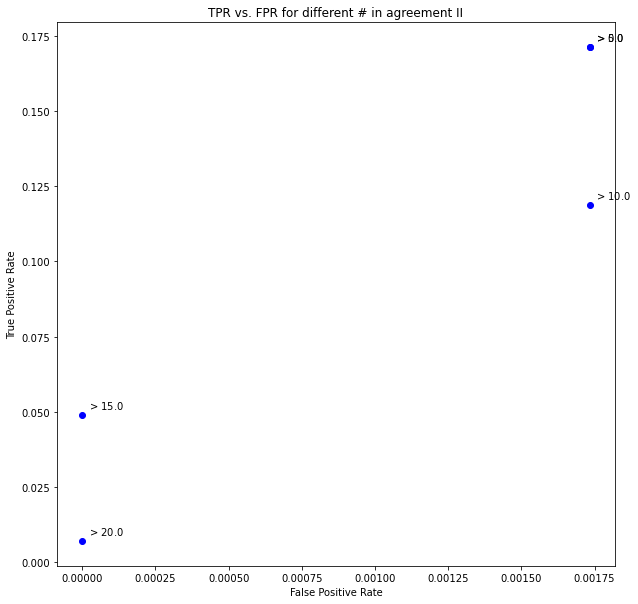

In [44]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence[:,2], cutoff_confidence[:,1], color = "blue")
for i in cutoff_confidence:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement II")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [45]:
negativeI = 0
positiveI = 0
for j in Joined_ZTF_2018:
    correct_1a = "Ia" in j["sn_type"]
    if(correct_1a):
        positiveI += 1
    if(not(correct_1a)):
        negativeI += 1

In [46]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence_Ia.append([i[0],truepositive/(positiveI),falsepositive/(negativeI),len(i[1]), truepositive, falsepositive])
cutoff_confidence_Ia = np.asarray(cutoff_confidence_Ia)

Text(0, 0.5, 'True Positive Rate')

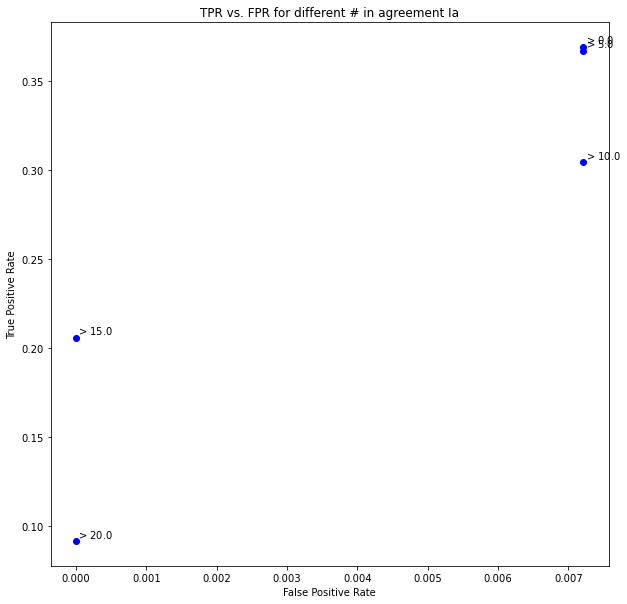

In [47]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_Ia[:,2], cutoff_confidence_Ia[:,1], color = "blue")
for i in cutoff_confidence_Ia:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement Ia")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [48]:
positiveI

447

In [49]:
positiveII

286

In [50]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            print(j)
    break

  ZTF_Name                 Version                 Real_c Zooniverse_c
------------ ------------------------------------ ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20180807_Keck1_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ----------------------------------- ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20190704_P200_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ------------------------------------ ------ ------------
ZTF18abuatfp ZTF18abuatfp_20181204_Keck1_v1.ascii    IIn       Ia-csm


In [51]:
tables[-1][1]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64
ZTF18aahfzea,ZTF18aahfzea_20180421_P60_v1.ascii,Ia,Ia-norm
ZTF18aainvic,ZTF18aainvic_20180622_TNG_v2.ascii,II,II-norm
ZTF18aajtlbf,ZTF18aajtlbf_20180420_P200_v1.ascii,Ia-91bg,Ia-91bg
ZTF18aakzliv,ZTF18aakzliv_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aalcxig,ZTF18aalcxig_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aaqgadq,ZTF18aaqgadq_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aaqpjja,ZTF18aaqpjja_20180522_P200_v1.ascii,Ia,Ia-norm
ZTF18aauizcr,ZTF18aauizcr_20180519_P60_v2.ascii,Ia,Ia-norm
ZTF18aawdpnm,ZTF18aawdpnm_20180605_P60_v1.ascii,Ia,Ia-norm


In [52]:
np.sum(ResultsTable_Zooniverse_Classes["Ia-norm"] > 6)

475

In [53]:
positiveI

447

In [54]:
negativeIbIc = 0
positiveIbIc = 0
index = 0
indexes = []
for j in Joined_ZTF_2018:
    correct_1a = ("Ib" in j["sn_type"]) or ("Ic" in j["sn_type"]) 
    if(correct_1a):
        positiveIbIc += 1
        indexes.append(index)
    if(not(correct_1a)):
        negativeIbIc += 1
    index += 1

In [55]:
cutoff_confidence_IbIc = [] 
for i in tables:
    truepositiveIbIc = 0
    falsepositiveIbIc = 0
    JoinedResults = i[1]
    for j in JoinedResults:
        correct_1a = ("Ib" in j["Real_c"])
        classified_1a = ("Ib" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
            
        correct_1a = ("Ic" in j["Real_c"])
        classified_1a = ("Ic" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
        
    cutoff_confidence_IbIc.append([i[0],truepositiveIbIc/(positiveIbIc),falsepositiveIbIc/(negativeIbIc),len(JoinedResults), truepositiveIbIc, falsepositiveIbIc])
cutoff_confidence_IbIc = np.asarray(cutoff_confidence_IbIc)

Text(0, 0.5, 'True Positive Rate')

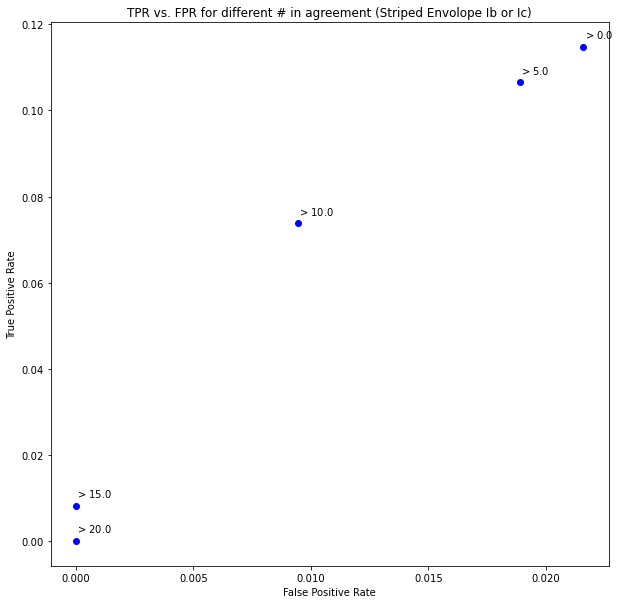

In [56]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_IbIc[:,2], cutoff_confidence_IbIc[:,1], color = "blue")
for i in cutoff_confidence_IbIc:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement (Striped Envolope Ib or Ic)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [57]:
for i in tables[-2][1]:
    if("Ib" in i["Real_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm
IIb Gal


In [58]:
for i in tables[-2][1]:
    if("Ib" in i["Zooniverse_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm


In [59]:
tables[0][1][tables[0][1]["Zooniverse_c"]=="NoMatch"]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64


In [60]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,9,2,0,0,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaazdba_20190315_P60_v1.ascii,ZTF17aaazdba,sn2013dg,4.27,0.2648,0.0143,1,1,sn2013dg,4.27,Ic-SLSN,0.2648,0.0143,5.16,0,2,ASASSN-15lh,4.2,Ic-SLSN,0.2981,0.0191,20.28,0,3,sn96L,4.15,IIn,0.3161,0.0071,322.8,0,7,sn2007C,4.07,Ib-norm,0.4644,0.0127,13.8,0,9,sn05gj,3.76,Ia-csm,0.0529,0.0182,48.11,0,53623579,7,3,0,0,0,1
ZTF17aaazdba_20190424_P60_v1.ascii,ZTF17aaazdba,sn90N,7.32,0.9621,0.0085,0,1,sn90N,7.32,Ia-norm,0.9621,0.0085,-6.4,0,3,SSS120810-23,6.15,Ic-SLSN,0.7381,0.0144,38.63,0,4,sn2015bn,5.83,Ic-SLSN,0.4979,0.0072,5.84,0,5,sn2013dx,5.41,Ic-BL,0.5423,0.016,-3.2,0,6,sn2008ax,5.32,IIb,0.7182,0.0101,-13.0,0,53623588,2,0,1,7,1,0
ZTF17aaazdba_20190925_Keck1_v4.ascii,ZTF17aaazdba,ASASSN14li,12.26,0.0225,0.002,1,1,ASASSN14li,12.26,TDE,0.0225,0.002,136.0,1,2,sn1994I,7.1,Ic-norm,0.0431,0.0105,3.5,0,3,sn97ef,7.1,Ic-BL,0.0431,0.0134,13.8,0,4,sn1999by,6.99,Ia-91bg,0.0409,0.0093,4.0,0,13,sn2002ap,5.88,Ic-BL,0.0424,0.0137,11.6,0,53623594,0,11,0,0,0,0
ZTF17aaburzk_20180717_P60_v1.ascii,ZTF17aaburzk,sn87A,7.8,0.0234,0.0089,1,1,sn87A,7.8,II-norm,0.0234,0.0089,11.3,0,2,sn2003Y,7.76,Ia-91bg,0.0333,0.0094,-6.3,0,10,sn2006ep,6.69,Ib-norm,0.0228,0.0108,8.5,0,17,sn1995F,6.39,Ic-norm,0.0267,0.0111,1.9,1,21,sn2007ax,6.16,Ia-91bg,0.0302,0.0123,-1.9,0,53623599,7,0,1,1,0,2
ZTF18aaabltn_20190502_DCT_v1.ascii,ZTF18aaabltn,qso,22.9,0.045,0.0012,1,1,qso,22.9,QSO,0.045,0.0012,-100.0,2,2,agn,21.11,AGN,0.0449,0.0014,-99.9,2,3,sn06bc,13.66,II-norm,0.0444,0.0018,9.0,0,4,kcSB3,11.93,Gal,0.0457,0.0019,-99.9,2,5,kcSB5,10.74,Gal,0.045,0.0021,-99.9,2,53623603,0,1,7,1,1,1
ZTF18aaadtdc_20181106_P60_v1.ascii,ZTF18aaadtdc,agn,30.5,0.0359,0.0013,1,1,agn,30.5,AGN,0.0359,0.0013,-99.9,2,2,qso,23.31,QSO,0.0358,0.0015,-100.0,2,3,kcSB5,14.41,Gal,0.0359,0.0024,-99.9,2,4,kcSB3,12.83,Gal,0.0366,0.0026,-99.9,2,5,sn06bc,12.54,II-norm,0.0352,0.0027,9.0,0,53623604,0,10,0,0,0,0


Further Analysis
Weighing Users Plot number of classifications vs accuracy
Weighting Schemes
Isolate Users or subclasses
Cluster things that are wrong
PanStarrs Subtraction
Age vs Accuracy
Phase of the spectra vs Accuracyclassification[ccs_workflow]

In [61]:
wanted = classification[ccs_workflow]

In [62]:
users = np.unique(wanted["user_name"])

In [63]:
len(users)

1980

In [64]:
location_list = []
counter = 0
for i in users:
    counter += 1
    locations = np.where(wanted["user_name"] == i)
    location_list.append(np.asarray([i,locations[0],len(locations[0])]))
    if(counter % 100 == 0):
        print(counter)
location_list = np.asarray(location_list)

C:\Users\20xha\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


(array([1.491e+03, 2.420e+02, 8.400e+01, 4.700e+01, 2.400e+01, 1.600e+01,
        1.400e+01, 7.000e+00, 1.000e+01, 8.000e+00, 5.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

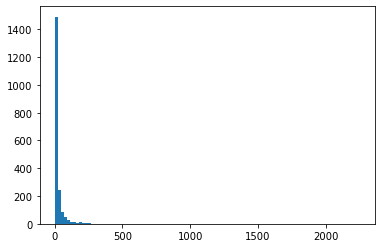

In [65]:
plt.hist(location_list[:, 2], bins = 100)

In [66]:
super_users = location_list[np.where(location_list[:,2] > 250)]

In [67]:
np.unique(location_list[:,2])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 93,
       96, 98, 99, 100, 101, 102, 104, 106, 107, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 123, 128, 129, 131, 133, 134,
       135, 141, 142, 143, 145, 146, 147, 149, 150, 153, 156, 157, 158,
       159, 161, 167, 171, 177, 180, 183, 186, 187, 193, 201, 202, 203,
       206, 207, 212, 215, 220, 223, 233, 238, 244, 246, 249, 254, 256,
       264, 265, 268, 275, 300, 363, 384, 424, 427, 440, 442, 488, 514,
       546, 566, 591, 595, 628, 742, 845, 940, 972, 1093, 1150, 1252,
       1386, 1630, 2249], dtype=object)

In [68]:
results = []
for amount_done in np.unique(location_list[:,2]):
    right = 0
    total = 0
    for line in location_list[np.where(location_list[:,2] == amount_done)]:
        these_classes = classification[ccs_workflow][line[1]]
        for i in these_classes:
            subject_data = json.loads(i["subject_data"])
            annotations = json.loads(i["annotations"])
            value = annotations[0]["value"]
            ztf_name = subject_data[str(i["subject_ids"])]["!ZTF_Name"]
            ztf_version = subject_data[str(i["subject_ids"])]["!ZTF_Version"]
            type_location = np.where(final_rcf_table["ZTF_Name"] == ztf_name)[0]
            if(len(type_location) > 0 and value != None):
                type_location = type_location[0]
                snid_location = np.where(snidoutput["Version"] == ztf_version+".ascii")[0][0]
                response_number = response_dict[value]
                if(response_number != 0):
                    snid_class = snidoutput[snid_location]["c_snid_{}".format(response_number)]
                    actual_class = final_rcf_table[type_location]["sn_type"]
                    if(actual_class == snid_class):
                        right += 1
                    elif(actual_class in snid_class):
                        right += 1
                    elif("Ia" in actual_class and "Ia" in snid_class):
                        right += 1
                    elif("II" in actual_class and "II" in snid_class):
                        right += 1
                    elif("Ib" in actual_class and "Ib" in snid_class):
                        right += 1
                    elif("Ic" in actual_class and "Ic" in snid_class):
                        right += 1
                    total += 1
    results.append([amount_done, right, total, right/total])

In [69]:
results = np.asarray(results)

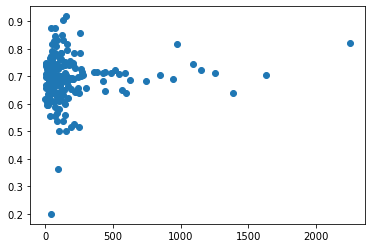

In [70]:
plt.scatter(results[:,0], results[:,3])

In [71]:
snidoutput[0]["c_snid_{}".format(1)]

'II-norm'

In [72]:
np.where(final_rcf_table["ZTF_Name"] == "ZTF18aabssth")[0]

array([0], dtype=int64)

In [73]:
np.unique(final_rcf_table["sn_type"])

II
II-87A
IIb
IIn
Ia
Ia-02cx
Ia-91T
Ia-91bg
Ia-SC
Ia-csm
Ib


In [74]:
np.unique(snidoutput["c_snid_1"])

AGN
C-star
Gal
II-norm
IIb
IIn
Ia-02cx
Ia-03fg
Ia-91T
Ia-91bg
Ia-csm


In [75]:
ztf_version+"ascii"

'ZTF18abjzaic_20180803_P60_v2ascii'

In [76]:
tables_age = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables_age.append([cut, Classes])

In [77]:
snid_superfit_results = Table.read(r"C:\Users\20xha\Documents\GitHub\supernova-spectrum-analysis\superfit/results_2018_all_exact_z.txt", format = "ascii")
snid_superfit_results.rename_column('name', 'Version')

In [78]:

tprfpr_snid = Table.read(r"C:\Users\20xha\Documents\GitHub\supernova-spectrum-analysis\superfit/tprfpr_snid.ascii", format = "ascii")

In [79]:
snid_superfit_results[0]

ZTF_Name,classification,redshift,HGz,JD,JD_peak,phase,Version,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str12,str9,float64,float64,float64,float64,float64,str39,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,II,0.026,0.022914,2458186.5,2458218.66,-32.16,ZTF18aabssth_20180309_P60_v1.ascii,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00


In [80]:
joined_phase = astropy.table.join(Classes_Final, snid_superfit_results)

In [81]:
phase_cutoffs = np.linspace(np.min(joined_phase["phase"]), np.max(joined_phase["phase"]), 100)

In [82]:
joined_phase[0]

ZTF_Name,Version,Real_c,Zooniverse_c,rlap,agreement,classification,redshift,HGz,JD,JD_peak,phase,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str64,str64,str64,str64,float32,int32,str9,float64,float64,float64,float64,float64,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,IIb,8.07,7,II,0.026,0.022914,2458186.5,2458218.66,-32.16,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00


In [83]:
negativeIa = 0
positiveIa = 0
for j in joined_phase:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

In [84]:
joined_phase

ZTF_Name,Version,Real_c,Zooniverse_c,rlap,agreement,classification,redshift,HGz,JD,JD_peak,phase,flag,is_good_spec,SF_fit_1,chi2_fit_1,zfit_1,zfit_2,SF_fit_2,chi2_fit_2,c_snid,c_rlap,z_snid,SNR,short_name
str64,str64,str64,str64,float32,int32,str9,float64,float64,float64,float64,float64,int32,str5,str18,float64,float64,float64,str18,float64,str12,float64,float64,float64,str45
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,IIb,8.07,7,II,0.026,0.022914,2458186.5,2458218.66,-32.16,1,True,II,0.0018563307,0.026,0.026,II,0.001928962,IIb,7.86,0.0358,10.398875055231802,2007od/LRIS+2007-11-12 04:35:02.00
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,Ib,IIn,8.91,8,Ib,0.055,0.04797,2458432.5,2458224.63,207.87,1,False,SLSN-I,0.0031540936,0.055,0.055,Ic-BL,0.0032135602,II-norm,9.64,0.0468,2.824064274131373,2015bn/X-Shooter+2016-03-05 00:00:00.00
ZTF18aaemivw,ZTF18aaemivw_20181104_P60_v1.ascii,Ia,Ia-csm,9.99,10,Ia,0.065,0.068069,2458426.5,2458423.99,2.51,1,True,IIn,0.0013187835,0.065,0.065,II,0.0014841992,Ia-csm,9.99,0.065,11.947405616578838,2005cp/DBSP+2005-10-24 00:00:00.00
ZTF18aagpzjk,ZTF18aagpzjk_20180320_P60_v1.ascii,II,Ia-csm,5.63,8,II,0.013,0.016308,2458197.5,2458217.61,-20.11,1,False,IIb,0.00922487,0.013,0.013,Ic-BL,0.010870627,Ia-norm,6.64,0.4645,22.770069221598078,2011dh/LRIS+2011-06-03 09:29:43.00
ZTF18aagpzjk,ZTF18aagpzjk_20180410_P200_v1.ascii,II,II-norm,15.86,9,II,0.013,0.016308,2458218.5,2458217.61,0.89,1,True,II,0.0044807694,0.013,0.013,II,0.004559476,II-norm,15.15,0.0132,9.438007745294799,2016esw/KAST+2016-09-10 04:50:52.00
ZTF18aagrdcs,ZTF18aagrdcs_20180327_P60_v1.ascii,Ib,Ib-norm,6.72,6,Ib,0.024,0.01814,2458204.5,2458217.84,-13.34,1,False,IIb,0.005011755,0.024,0.024,SLSN-I,0.005489839,Ia-91T,6.39,0.1643,11.04431273084555,2001ig/LRIS+2001-12-23 00:00:00.00
ZTF18aagrdcs,ZTF18aagrdcs_20180419_P200_v1.ascii,Ib,Ib-norm,18.05,7,Ib,0.024,0.01814,2458227.5,2458217.84,9.66,1,False,Ib,0.0056653935,0.024,0.024,Ib,0.0070888856,Ib-norm,17.7,0.0152,7.169928363085549,2009jf/FORS2+2009-10-28 00:00:00.00
ZTF18aagrdcs,ZTF18aagrdcs_20180419_TNG_v1.ascii,Ib,Ic-norm,12.36,7,Ib,0.024,0.01814,2458227.5,2458217.84,9.66,1,True,Ib,0.016707946,0.024,0.024,Ca-Ib,0.018156072,Ib-norm,17.13,0.0122,22.946946461804757,2009jf/FORS2+2009-10-28 00:00:00.00
ZTF18aagrtxs,ZTF18aagrtxs_20180328_P60_v1.ascii,Ia,Ia-norm,12.75,11,Ia,0.018,0.029664,2458205.5,2458214.68,-9.18,1,True,Ia-norm,0.0037926412,0.018,0.018,Ia-norm,0.0040799333,Ia-norm,10.69,0.0142,8.837712025641338,2017erp/KAST+2017-06-26 05:19:40.00


In [85]:
tprfpr_zooniverse = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["Real_c"]

                c_snid = "Ia" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse.add_row(row)   

In [86]:
positiveIa

441

In [87]:
62/441

0.14058956916099774

Text(0, 0.5, 'True Positive Rate')

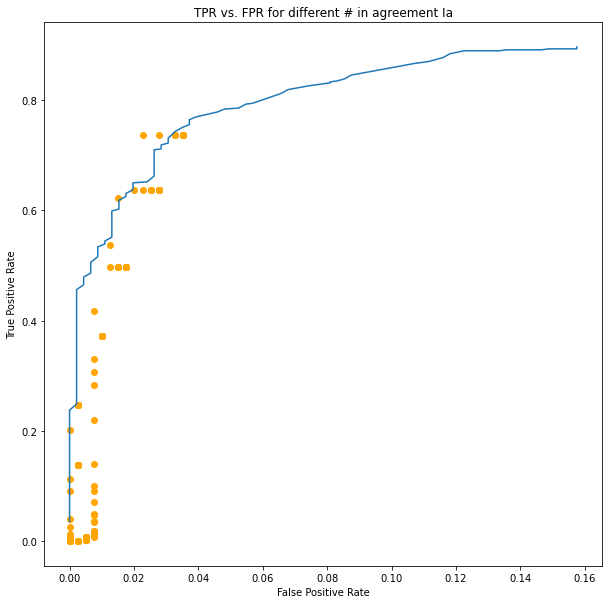

In [88]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse["fpr_zooniverse"], tprfpr_zooniverse["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

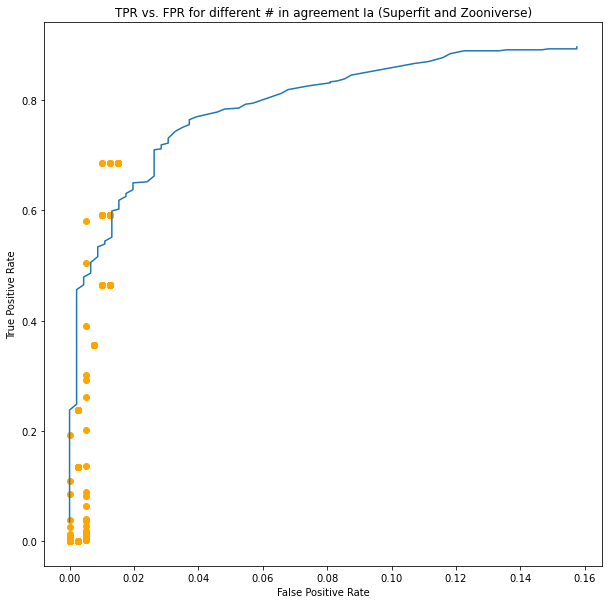

In [89]:
tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["Real_c"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [90]:
negativeII = 0
positiveII = 0
for j in joined_phase:
    correct_1a = "II" in j["classification"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

In [91]:
tprfpr_snid_II = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "II" in i["Real_c"]

            c_snid = "II" in i["c_snid"]
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveII, falsepositive[0]/negativeII]
    tprfpr_snid_II.add_row(row)   

In [92]:
tprfpr_zooniverse_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "II" in i["Real_c"]

                c_snid = "II" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_II.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

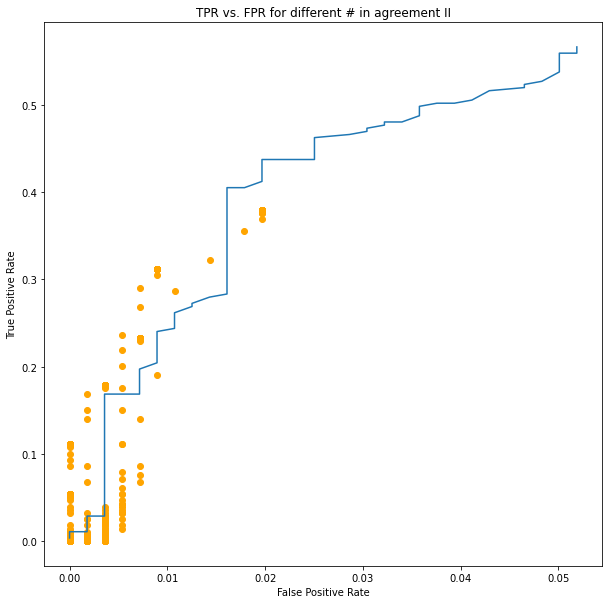

In [93]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_II["fpr_zooniverse"], tprfpr_zooniverse_II["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement II")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

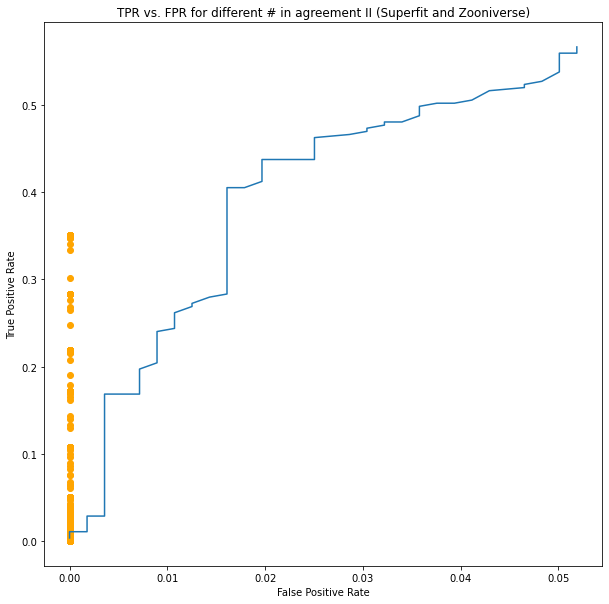

In [128]:
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "II" in i["Real_c"]
                
                c_zoonivserse = "II" in i["Zooniverse_c"]
                c_superfit = "II" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_II.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement II (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [129]:
tprfpr_zooniverse_superfit_II[np.argmax(tprfpr_zooniverse_superfit_II["tpr_zooniverse"])]

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
-371.19,6.0,0.35125448028673834,0.0


Text(0, 0.5, 'True Positive Rate')

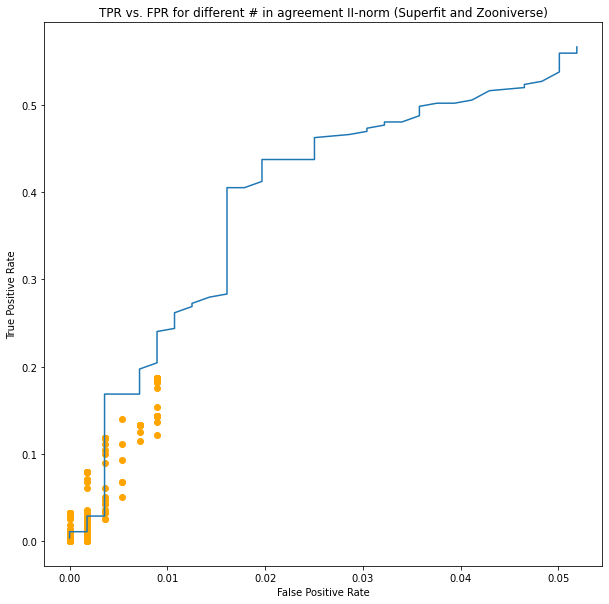

In [95]:
tprfpr_zooniverse_superfit_II = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "II" == i["Real_c"]
                
                c_zoonivserse = "II-norm" == i["Zooniverse_c"]
                c_superfit = "II" == i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_II.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_II["fpr_zooniverse"], tprfpr_zooniverse_superfit_II["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_II["fpr_snid"], tprfpr_snid_II["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement II-norm (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [96]:
negativeIb = 0
positiveIb = 0
for j in joined_phase:
    correct_1a = "Ib" in j["classification"]
    if(correct_1a):
        positiveIb += 1
    if(not(correct_1a)):
        negativeIb += 1

In [97]:
tprfpr_snid_Ib = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ib" in i["Real_c"]

            c_snid = "Ib" in i["c_snid"]
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIb, falsepositive[0]/negativeIb]
    tprfpr_snid_Ib.add_row(row)

In [98]:
tprfpr_zooniverse_Ib = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["Real_c"]

                c_snid = "Ib" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIb, falsepositive[0]/negativeIb]
        tprfpr_zooniverse_Ib.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

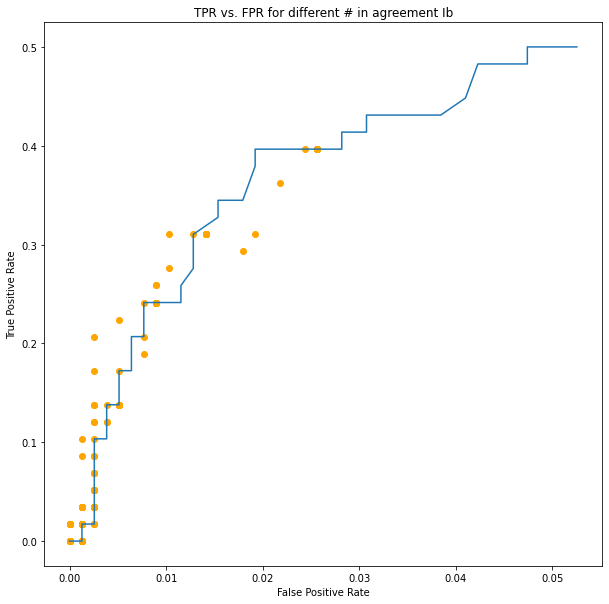

In [99]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ib["fpr_zooniverse"], tprfpr_zooniverse_Ib["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ib["fpr_snid"], tprfpr_snid_Ib["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ib")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

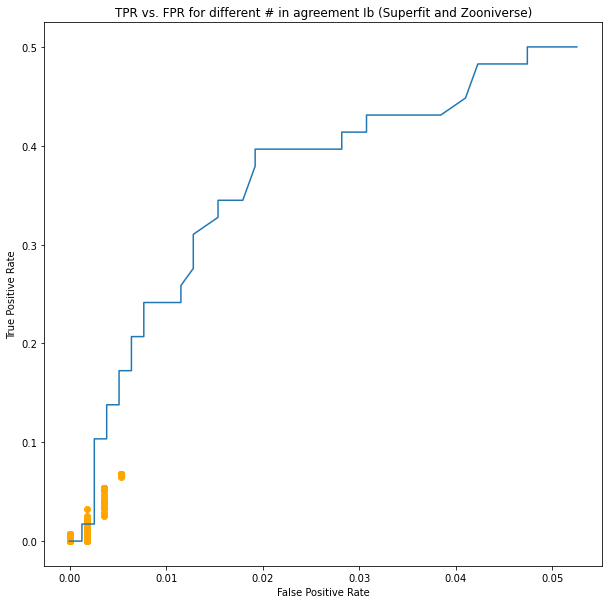

In [100]:
tprfpr_zooniverse_superfit_Ib = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["Real_c"]
                
                c_zoonivserse = "Ib" in i["Zooniverse_c"]
                c_superfit = "Ib" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_Ib.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ib["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ib["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ib["fpr_snid"], tprfpr_snid_Ib["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ib (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [101]:
negativeIc = 0
positiveIc = 0
for j in joined_phase:
    correct_1a = "Ic" in j["classification"]
    if(correct_1a):
        positiveIc += 1
    if(not(correct_1a)):
        negativeIc += 1

In [102]:
tprfpr_snid_Ic = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ic" in i["Real_c"]

            c_snid = "Ic" in i["c_snid"]
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIc, falsepositive[0]/negativeIc]
    tprfpr_snid_Ic.add_row(row)

In [103]:
tprfpr_zooniverse_Ic = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ic" in i["Real_c"]

                c_snid = "Ic" in i["Zooniverse_c"]
                if(c_actual == True and c_snid == True):
                    truepositive[0] += 1
                if(c_actual != True and c_snid == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIc, falsepositive[0]/negativeIc]
        tprfpr_zooniverse_Ic.add_row(row)   

Text(0, 0.5, 'True Positive Rate')

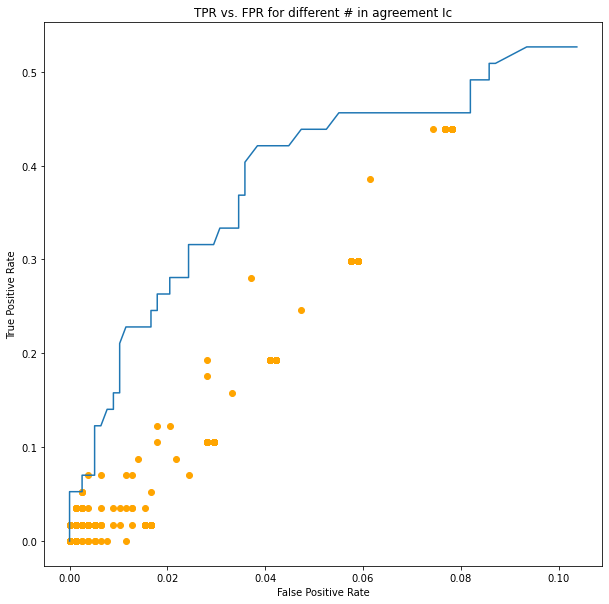

In [104]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ic["fpr_zooniverse"], tprfpr_zooniverse_Ic["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ic["fpr_snid"], tprfpr_snid_Ic["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

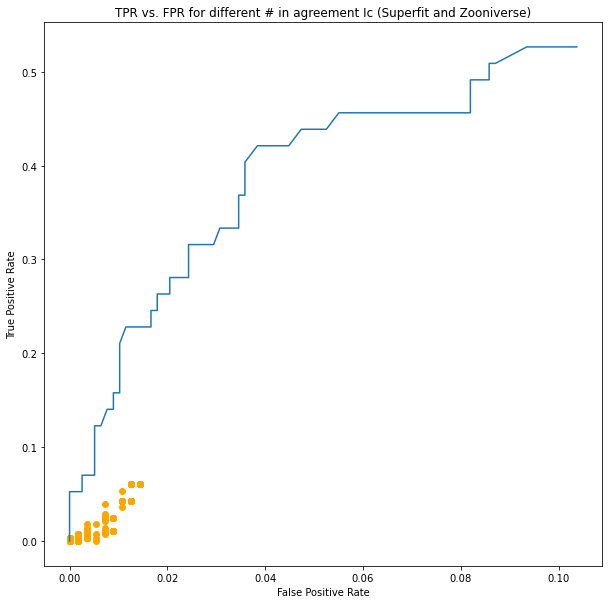

In [105]:
tprfpr_zooniverse_superfit_Ic = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ic" in i["Real_c"]
                
                c_zoonivserse = "Ic" in i["Zooniverse_c"]
                c_superfit = "Ic" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveII, falsepositive[0]/negativeII]
        tprfpr_zooniverse_superfit_Ic.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ic["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ic["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ic["fpr_snid"], tprfpr_snid_Ic["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [106]:
positiveIbc = 0
negativeIbc = 0
for j in joined_phase:
    correct_1a = "Ib" in j["classification"] or "Ic" in j["classification"]
    if(correct_1a):
        positiveIbc += 1
    if(not(correct_1a)):
        negativeIbc += 1

In [107]:
tprfpr_snid_Ibc = Table(
                names=("rlap", "tpr_snid", "fpr_snid"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64"
                      )) 
for rlap in np.linspace(0, 25, 251):
    truepositive = [0, 0, 0]
    falsepositive = [0, 0, 0]
    for i in joined_phase:
        if(i["rlap"] >= rlap):
            c_actual = "Ib" in i["Real_c"] or "Ic" in i["Real_c"]
            c_snid = "Ib" in i["Zooniverse_c"] or "Ic" in i["Zooniverse_c"]
            
            if(c_actual == True and c_snid == True):
                truepositive[0] += 1
            if(c_actual != True and c_snid == True):
                falsepositive[0] += 1
    row = [rlap, truepositive[0]/positiveIbc, falsepositive[0]/negativeIbc]
    tprfpr_snid_Ibc.add_row(row)

In [108]:
tprfpr_zooniverse_Ibc = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      )) 
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ib" in i["Real_c"] or "Ic" in i["Real_c"]
                
                c_zoonivserse = "Ib" in i["Zooniverse_c"] or "Ic" in i["Zooniverse_c"]
                c_superfit = "Ib" in i["SF_fit_1"] or "Ic" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIbc, falsepositive[0]/negativeIbc]
        tprfpr_zooniverse_Ibc.add_row(row)   

(0.0, 0.5)

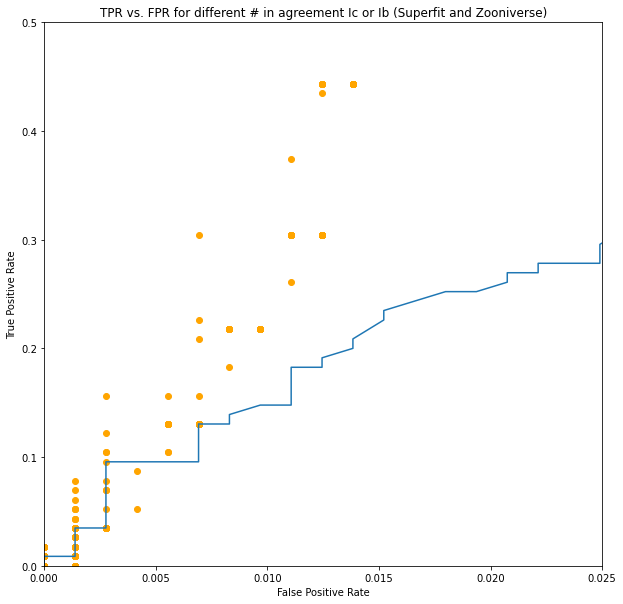

In [109]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_Ibc["fpr_zooniverse"], tprfpr_zooniverse_Ibc["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid_Ibc["fpr_snid"], tprfpr_snid_Ibc["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ic or Ib (Superfit and Zooniverse)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 0.025)
plt.ylim(0, .5)

In [116]:
is_sedm = []
not_sedm = []
for i in joined_phase["Version"]:
    is_sedm.append("P60" in i)
    not_sedm.append(not("P60" in i))

Text(0, 0.5, 'True Positive Rate')

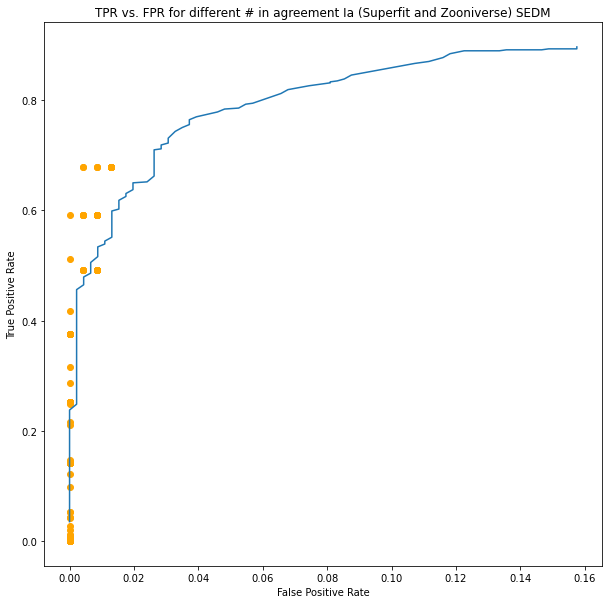

In [121]:
negativeIa = 0
positiveIa = 0
for j in joined_phase[is_sedm]:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase[is_sedm]:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["Real_c"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia (Superfit and Zooniverse) SEDM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'True Positive Rate')

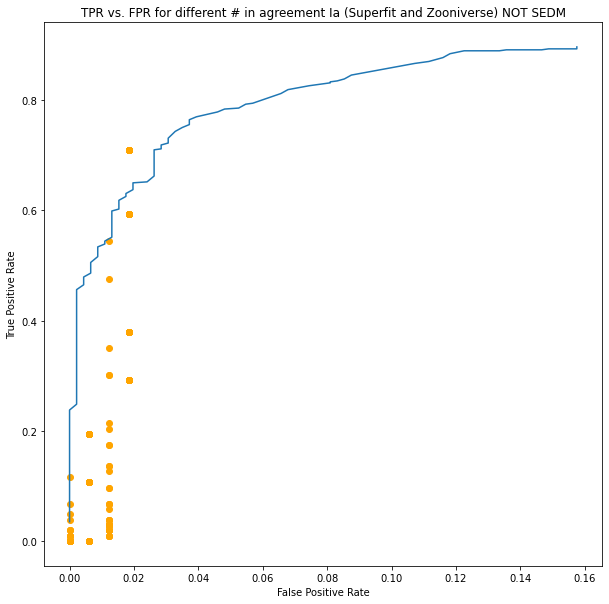

In [122]:
negativeIa = 0
positiveIa = 0
for j in joined_phase[not_sedm]:
    correct_1a = "Ia" in j["classification"]
    if(correct_1a):
        positiveIa += 1
    if(not(correct_1a)):
        negativeIa += 1

tprfpr_zooniverse_superfit_Ia = Table(
                names=("phase", "agreement", "tpr_zooniverse", "fpr_zooniverse"
                ),
                meta={"name": "Comparison of Three Programs"},
                dtype=("float64", "float64", "float64", "float64"
                      ))
for phase in phase_cutoffs:
    for agreement in cutoffs:
        truepositive = [0, 0, 0]
        falsepositive = [0, 0, 0]
        for i in joined_phase[not_sedm]:
            if(i["phase"] > phase and i["agreement"] >= agreement):
                c_actual = "Ia" in i["Real_c"]
                
                c_zoonivserse = "Ia" in i["Zooniverse_c"]
                c_superfit = "Ia" in i["SF_fit_1"]
                c = c_zoonivserse and c_superfit
                if(c_actual == True and c == True):
                    truepositive[0] += 1
                if(c_actual != True and c == True):
                    falsepositive[0] += 1
        row = [phase, agreement, truepositive[0]/positiveIa, falsepositive[0]/negativeIa]
        tprfpr_zooniverse_superfit_Ia.add_row(row)

fig = plt.figure(figsize = (10,10))
plt.scatter(tprfpr_zooniverse_superfit_Ia["fpr_zooniverse"], tprfpr_zooniverse_superfit_Ia["tpr_zooniverse"], color = "orange")
plt.plot(tprfpr_snid["fpr_snid"], tprfpr_snid["tpr_snid"])
plt.title("TPR vs. FPR for different # in agreement Ia (Superfit and Zooniverse) NOT SEDM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [123]:
tprfpr_zooniverse_superfit_Ia

phase,agreement,tpr_zooniverse,fpr_zooniverse
float64,float64,float64,float64
-371.19,6.0,0.7087378640776699,0.018404907975460124
-371.19,7.0,0.5922330097087378,0.018404907975460124
-371.19,8.0,0.3786407766990291,0.018404907975460124
-371.19,9.0,0.2912621359223301,0.018404907975460124
-371.19,10.0,0.1941747572815534,0.006134969325153374
-371.19,11.0,0.10679611650485436,0.006134969325153374
-361.90656565656565,6.0,0.7087378640776699,0.018404907975460124
-361.90656565656565,7.0,0.5922330097087378,0.018404907975460124
-361.90656565656565,8.0,0.3786407766990291,0.018404907975460124
